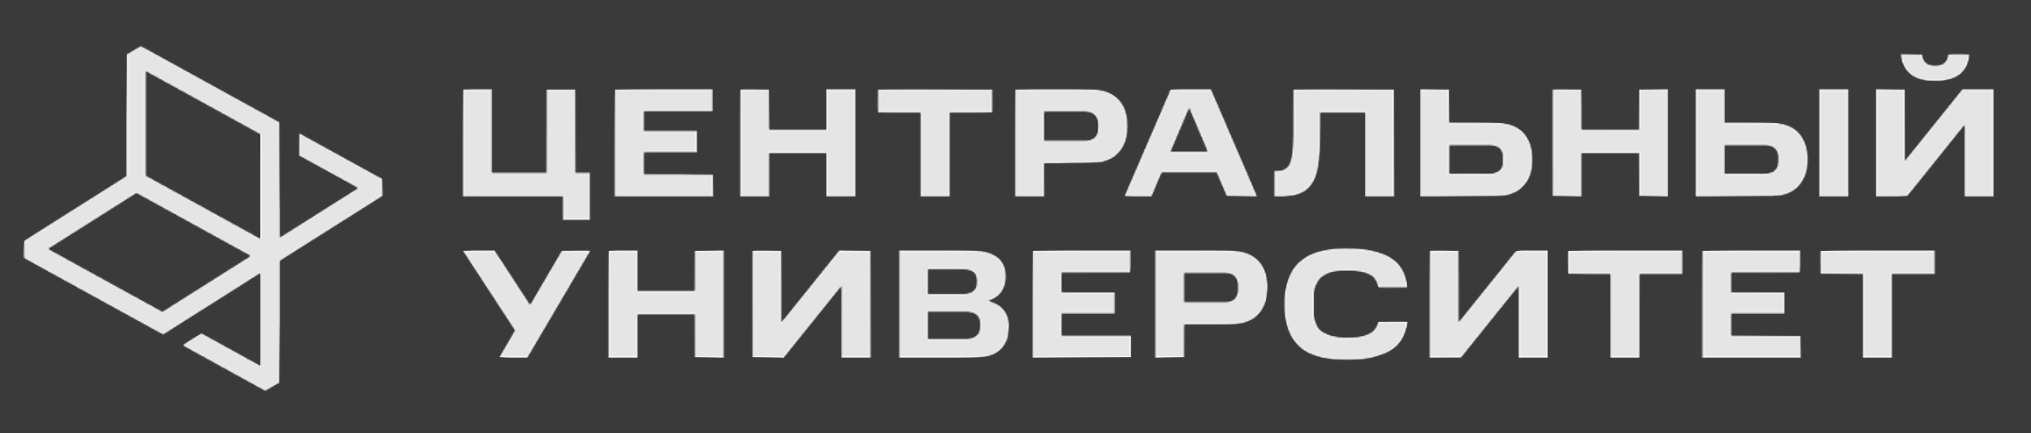

# Курс по Машинному обучению

## Домашнее задание 2. Numpy + визуализация (30 баллов + 10 баллов бонус)

## О сроках

Дата выдачи: 18.09.2023

Мягкий дедлайн: 25.09.2023 23:59MSK

Жесткий дедлайн со штрафом: 05.10.2023 23:59MSK (10 дней от мягкого дедлайна)

За каждый день просрочки снимается 5% от макс. балла (1,5 балла)

# Важно! О формате сдачи

* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулировке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**
*  **Если в ячейке написана фраза "Вывод"/"Ответ на вопрос"/"Ваш текст" и пр., то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно).**
* **Если в ячейке написано "Your code here"/"Ваш код" и пр., то ожидается ответ в виде кода (можете добавить больше ячеек с кодом, если считаете это необходимым, но это необязательно).**
* **Если есть и ячейка с фразой "Вывод" и пр., и ячейка с фразой "Your code here" и пр., то в ответе ожидается и код, и текст)**

## О задании

Задание состоит из задач, направленных на закрепление навыков работы с библиотекой `numpy` и визуализации данных с помощью библиотек `matplotlib` и `seaborn`. Баллы даются за выполнение отдельных пунктов. Задачи по `numpy` можно решать в любом порядке, задачи на визуализацию рекомендуется решать в том порядке, в котором они даны в задании.


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)

--------

# Часть 1. Numpy

* В данной части вам будет предложено реализовать несколько функций на чистом Python *(невекторизованный вариант)* и с помощью библиотеки `numpy` *(векторизованный вариант)*.

* В этой части для помощи в решении задач здесь будут приведены несколько вспомогательных тестов (через `assert`), а во второй части будет предложено сравнить скорость работы невекторизованнх и векторизованных реализаций

 <font color='red'>Внимание!</font> Приведенные здесь тесты не гарантируют полное покрытие, они здесь присутствуют только для помощи вам в реализации заданных задач

----

Для каждой из задач ниже привидите 2 реализации: одна без использования `numpy` (невекторизованный вариант), а вторая полностью векторизованная (**без использования циклов/map/list comprehension**). Реализации без использования векторизации нужно записать в функции с суффиксом `_simple`, а векторизованные — в функции с суффиксом `_vectorized` (см. шаблоны).

<font color='red'>**Внимание!**</font>

Векторизованные реализации с использованием циклов/map/list comprehension оцениваются в <font color='red'>0 баллов</font>.

In [ ]:
# импортируем необходимые библиотеки

import numpy as np
import pickle
import traceback
from typing import List

## Задача 1  <font color='orange'>[4 балла]</font>

Посчитать  сумму неотрицательных элементов на главной диагонали прямоугольной матрицы `X`. Если неотрицательных элементов на этой диагонали нет, то вернуть `-1`.

`X` может быть пустым

**Пример:**
  
      Input: X = np.array([[-1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
      Output: 3

In [ ]:
def sum_non_neg_diag_simple(X: List[List[float]]) -> float:
    # your code here
    if len(X) == 0:
        return -1
    res = 0
    length = min(len(X), len(X[0]))
    for i in range(length):
        if X[i][i] > 0:
            res += X[i][i]
    res = res or -1
    return res


def sum_non_neg_diag_vectorized(X: np.ndarray) -> float:
    # your code here
    return np.sum(np.diag(X)[np.diag(X) > 0]) or -1


Проверим себя:

In [ ]:
! gdown 1XaATdWfug4FHAC8h8keV61coUJH7GGeE

Downloading...
From: https://drive.google.com/uc?id=1XaATdWfug4FHAC8h8keV61coUJH7GGeE
To: /content/task1.npy
100% 179k/179k [00:00<00:00, 83.1MB/s]


In [ ]:
with open("/content/task1.npy", "rb") as fin:
    try:
        while True:
            X, ans = np.load(fin, allow_pickle=True)
            assert(np.allclose(sum_non_neg_diag_vectorized(X), ans))
            assert(np.allclose(sum_non_neg_diag_simple(X.tolist()), ans))
    except AssertionError as e:
        print("Test failed. The last input and answer are in variables X and ans")
        print("Error:")
        traceback.print_exc()
    except pickle.UnpicklingError or OSError:
        print("All tests are OK!")

All tests are OK!


## Задача 2  <font color='orange'>[4 балла]</font>

Даны одномерные непустые массивы `A` и `B`. Элементы целочисленного массива `B` принимают значения от `0` до `len(A) - 1`. Требуется прибавить единицу ко всем элементам `A`, чьи индексы записаны в `B`. Если индекс встречается в B несколько раз, то надо прибавить единицу для каждого такого вхождения.

**Tip:** посмотрите на функцию `np.bincount`



**Пример:**
  
      Input:
        A = np.array([1, 2, 3]),
        B = np.array([0, 1, 0, 0, 2, 2, 1])
      Output:
        np.array([4, 4, 5])

In [ ]:
def update_a_by_indices_from_b_simple(A: List[float], B: List[int]) -> List:
    # your code here
    for i in B:
        A[i] += 1
    return A

def update_a_by_indices_from_b_vectorized(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    # your code here
    B = np.hstack((B, len(A) - 1))
    res = np.bincount(B)
    res[-1] -= 1
    res
    return A + res

Проверим себя:

In [ ]:
! gdown 1LZOxjvnnWPNHE7hC5tZXrLUfT7bhg1B_

Downloading...
From: https://drive.google.com/uc?id=1LZOxjvnnWPNHE7hC5tZXrLUfT7bhg1B_
To: /content/task2.npy
100% 7.79k/7.79k [00:00<00:00, 20.2MB/s]


In [ ]:
with open("/content/task2.npy", "rb") as fin:
    try:
        while True:
            A, B, ans = np.load(fin, allow_pickle=True)
            assert(np.all(update_a_by_indices_from_b_vectorized(A, B) == ans))
            assert(np.all(np.array(update_a_by_indices_from_b_simple(A.tolist(), B.tolist())) == ans))
    except AssertionError:
        print("Test failed. The last input and answer are in variables A, B and ans")
        print("Error:")
        traceback.print_exc()
    except pickle.UnpicklingError or OSError:
        print("All tests are OK!")

All tests are OK!


## Задача 3  <font color='orange'>[4 балла]</font>

Пронумеровать (отсчет ведется с 1) в порядке следования максимальные элементы в одномерном непустом векторе `X`

**Пример:**
  
      Input:
        X = np.array([1, 2, 3, 3, 2, 1, 3, 1]),
      Output:
        np.array([0, 0, 1, 2, 0, 0, 3, 0])

In [ ]:
def order_of_maxs_simple(X: List[int]) -> List[int]:
    # your code here
    res = []
    m = max(X)
    k = 1
    for i in range(len(X)):
        if X[i] == m:
           res.append(k)
           k += 1
        else:
            res.append(0)
    return res


def order_of_maxs_vectorized(X: np.ndarray) -> np.ndarray:
    # your code here
    A = np.array(X == np.max(X), int)
    A[A != 0] = np.cumsum(A[A != 0])
    return A

Проверим себя:

In [ ]:
! gdown 1hauFJ-jUe8aLO8e-bYTLkMpLziC0Q2Dj

Downloading...
From: https://drive.google.com/uc?id=1hauFJ-jUe8aLO8e-bYTLkMpLziC0Q2Dj
To: /content/task3.npy
100% 8.59k/8.59k [00:00<00:00, 19.1MB/s]


In [ ]:
with open("/content/task3.npy", "rb") as fin:
    try:
        while True:
            X, ans = np.load(fin, allow_pickle=True)
            assert(np.all(order_of_maxs_vectorized(X) == ans))
            assert(np.all(np.array(order_of_maxs_simple(X.tolist())) == ans))
    except AssertionError:
        print("Test failed. The last input and answer are in variables X and ans")
        print("Error:")
        traceback.print_exc()
    except pickle.UnpicklingError or OSError:
        print("All tests are OK!")

All tests are OK!


## Задача 4  <font color='orange'>[5 баллов]</font>

Дан непустой трёхмерный массив `X`, содержащий изображение, размера `(height, width, num_channels)`, а также непустой вектор весов `w` длины `num_channels`.

Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера `(height, width)`.

***Обратите внимание, что в изображении необязательно num_channels=3!***

**Пример:**

    Input:
        X = np.array([[[1, 1, 1], [2, 2, 2], [3, 3, 3]], [[4, 4, 4], [5, 5, 5], [6, 6, 6]], [[7, 7, 7], [8, 8, 8], [9, 9, 9]]])
        w = np.array([1, 2, 3])
    Output:
        np.array([[6, 12, 18], [24, 30, 36], [42, 48, 54]])

In [ ]:
def convert_image_simple(X: List[List[List[float]]], w: List[float]) -> List[List[float]]:
    # your code here
    height, width, num_channels = len(X), len(X[0]), len(X[0][0])
    result = [[0] * width for _ in range(height)]

    for i in range(height):
        for j in range(width):
            pixel_sum = 0
            for k in range(num_channels):
                pixel_sum += X[i][j][k] * w[k]
            result[i][j] = pixel_sum

    return result

def convert_image_vectorized(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    # your code here
    return X @ w

Проверим себя:

In [ ]:
! gdown 1iIKNcxMnrItgk7ZF5Ddf44b14-AJevUj

Downloading...
From: https://drive.google.com/uc?id=1iIKNcxMnrItgk7ZF5Ddf44b14-AJevUj
To: /content/task4.npy
100% 3.53M/3.53M [00:00<00:00, 143MB/s]


In [ ]:
with open("/content/task4.npy", "rb") as fin:
    try:
        while True:
            X, w, ans = np.load(fin, allow_pickle=True)
            assert(np.allclose(convert_image_vectorized(X, w), ans))
            assert(np.allclose(np.array(convert_image_simple(X.tolist(), w.tolist())), ans))
    except AssertionError:
        print("Test failed. The last input and answer are in variables X, w and ans")
        print("Error:")
        traceback.print_exc()
    except pickle.UnpicklingError or OSError:
        print("All tests are OK!")

All tests are OK!


## Задача 5 (бонусная)  <font color='orange'>[5 бонусных баллов]</font>

Даны две непустые выборки объектов -- `X` и `Y`. Вычислить матрицу косинусных расстояний между объектами `X` и `Y`.

Пусть `X` -- матрица объектов размера `(n, d)` (`n` - число объектов, `d` - число признаков), `Y` -- матрица из размера `(m, d)` (`m` - число объектов, `d` - число признаков).

Тогда матрица косинусных расстояний `M` - матрица размера `(n, m)`, где $m_{ij}$ -- косинус угла между `i-м` объектом из матрицы `Х` (`i-ая` строка) и `j-м` объектом из матрицы `Y` (`j-ая` строка матрицы `Y`).

Если хотя бы один из векторов равен `0`, то косинусное расстояние определим равным `1`.

**Пример:**
  
      Input:
        X = np.array([[0, 0, 0], [1, 0, 0]]),
        Y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
      Output:
        np.array([[1, 1, 1], [1, 0, 0]])

In [ ]:
def cosine_distance_simple(X: List[List[float]], Y: List[List[float]]) -> List[List[float]]:
    # your code here
    def mult(x, y):
        res = 0
        for i in range(len(x)):
            res += x[i] * y[i]
        return res

    def norm(x):
        res = 0
        for coord in x:
            res += coord ** 2
        return res ** 0.5


    res = []
    #zero = [0] * len(X[0])
    for x in X:
        temp = []
        for y in Y:
            #if x == zero or y == zero:
            if norm(x) == 0 or norm(y) == 0:
                temp.append(1)
                continue
            dist = mult(x, y) / (norm(x) * norm(y))
            temp.append(dist)
        res.append(temp)


    return res



def cosine_distance_vectorized(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    # your code here
    x_norm = np.linalg.norm(X, axis=1, keepdims=True)
    y_norm = np.linalg.norm(Y, axis=1, keepdims=True)

    x = X / x_norm
    y = Y / y_norm
    A = np.dot(x, y.T)
    A[np.isnan(A)] = 1
    return A

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Проверим себя:

In [ ]:
! gdown 1L2RfzokB7y6_x5jIyiVT1gvJwjgUiVBh

Downloading...
From: https://drive.google.com/uc?id=1L2RfzokB7y6_x5jIyiVT1gvJwjgUiVBh
To: /content/task5.npy
100% 387k/387k [00:00<00:00, 86.2MB/s]


In [ ]:
with open("/content/task5.npy", "rb") as fin:
    try:
        while True:
            X, Y, ans = np.load(fin, allow_pickle=True)
            assert(np.allclose(cosine_distance_vectorized(X, Y), ans))
            assert(np.allclose(np.array(cosine_distance_simple(X.tolist(), Y.tolist())), ans))
    except AssertionError:
        print("Test failed. The last input and answer are in variables X, Y and ans")
        print("Error:")
        traceback.print_exc()
    except pickle.UnpicklingError or OSError:
        print("All tests are OK!")

All tests are OK!


---------

# Часть 2. Визуализация

* В данной части вы сравните эффективность *(невекторизованных)* и *(векторизованных)* реализаций из Части 1.

* Также вы поупражняетесь в различных способах визуализации предложенных данных


Сначала напомним о рекомендациях по оформлению графиков:

## Оформление графиков

Важно, чтобы все графики выглядели опрятно и соответствовали следующим правилам:

- должно быть название (plt.title) графика;
- на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel);
- должны быть подписаны единицы измерения (если это возможно);
- все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код;
- подписи тиков на осях не должны сливаться как на одной оси, так и между ними;
- если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend);
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
- при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

%matplotlib inline

## Задача 1  <font color='orange'>[3 балла]</font>

*   **<font color='orange'>[2 балла]</font>** Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. Для этого постройте графики времени работы векторизованной и невекторизованной реализации в зависимости от размера данных. Код генерации данных разных размеров и функция для замера времени работы функций уже написаны.
    * На выходе мы ожидаем 4 или 5 _понятных и хорошо оформленных_ графиков типа plot, по которым можно сравнить производительность функций. Рекомендации по оформлению графиков можно прочитать выше
*   **<font color='orange'>[1 балл] </font>**  Сделайте выводы о времени работы функций. Какие функции отработали быстрее на numpy быстрее, чем самописный вариант? Если отработали медленнее, то как вы думаете, почему?

In [ ]:
# Все эти функции менять не нужно
# Параметр max_size по умолчанию является рекомендуемым
# samples_cnt при желании можно поменять в большую сторону

def generate_data_task1(max_size=10000, samples_cnt=30):
    samples = []
    grid = np.linspace(1, max_size, samples_cnt, dtype=int)
    sizes = []

    for N in grid:
        M = max(N // 10, 1)
        samples.append((np.random.uniform(low=-100, high=100, size=(N,M)),)) # тут кладется tuple из 1го элемента
        sizes.append(N * M)

    return samples, np.array(sizes)


def generate_data_task2(max_size=100000, samples_cnt=30):
    samples = []
    grid = np.linspace(1, max_size, samples_cnt, dtype=int)
    sizes = []

    for N in grid:
        M = max(N // 10, 1)
        A = np.random.uniform(low=-100, high=100, size=(N,))
        B = np.random.randint(low=0, high=A.shape[0], size=(M,))
        samples.append((A, B))
        sizes.append(N + M)

    return samples, np.array(sizes)


def generate_data_task3(max_size=10000, samples_cnt=30):
    samples = []
    grid = np.linspace(1, max_size, samples_cnt, dtype=int)

    for N in grid:
        samples.append((np.random.randint(low=-100, high=100, size=(N,)),)) # тут кладется tuple из 1го элемента

    return samples, grid


def generate_data_task4(max_size=10000, samples_cnt=30):
    samples = []
    grid = np.linspace(1, max_size, samples_cnt, dtype=int)
    sizes = []

    for N in grid:
        M = max(N // 100, 1)
        K = max(N // 1000, 1)
        X = np.random.rand(N, M, K)
        w = np.random.uniform(low=-1, high=2, size=(K,))
        samples.append((X, w))
        sizes.append(N * M * K + K)

    return samples, np.array(sizes)


def generate_data_task5(max_size=1000, samples_cnt=30):
    samples = []
    grid = np.linspace(1, max_size, samples_cnt, dtype=int)
    sizes = []

    for N in grid:
        M = max(N // 100, 1)
        D = max(N // 100, 1)
        X = np.random.uniform(low=-10, high=10, size=(N, D))
        Y = np.random.uniform(low=-10, high=10, size=(M, D))
        samples.append((X, Y))
        sizes.append(N * D + M * D)

    return samples, np.array(sizes)


def func_time(func, *data):
    start = time.time()
    func(*data)
    return time.time() - start

In [ ]:
# Может быть вам пригодится
# По объекту функции f можно получить его имя в виде строки: f.__name__
FUNCS_DATA = {
    "generate_data_task1" : (sum_non_neg_diag_simple, sum_non_neg_diag_vectorized),
    "generate_data_task2" : (update_a_by_indices_from_b_simple, update_a_by_indices_from_b_vectorized),
    "generate_data_task3" : (order_of_maxs_simple, order_of_maxs_vectorized),
    "generate_data_task4" : (convert_image_simple, convert_image_vectorized),
    "generate_data_task5" : (cosine_distance_simple, cosine_distance_vectorized),
}

In [ ]:
# Ваш код с графиками тут (напоминаю, что можно создавать доп ячейки кода, если хотите)
time_list_simple = []
time_list_vectorized = []
data = generate_data_task1()
sizes = data[1]
for i in data[0]:
    time_list_simple.append(func_time(FUNCS_DATA['generate_data_task1'][0], i[0]))
    time_list_vectorized.append(func_time(FUNCS_DATA['generate_data_task1'][1], i[0]))

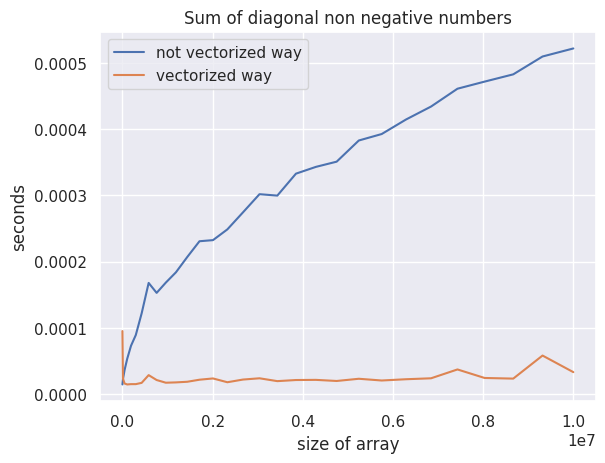

In [ ]:
plt.title("Sum of diagonal non negative numbers")
plt.plot(sizes, time_list_simple)
plt.plot(sizes, time_list_vectorized)
plt.xlabel('size of array')
plt.ylabel('seconds')
plt.legend(["not vectorized way", "vectorized way"]);

In [ ]:
time_list_simple_2 = []
time_list_vectorized_2 = []
data = generate_data_task2()
sizes = data[1]
for i in data[0]:
    time_list_simple_2.append(func_time(FUNCS_DATA['generate_data_task2'][0], i[0], i[1]))
    time_list_vectorized_2.append(func_time(FUNCS_DATA['generate_data_task2'][1], i[0], i[1]))

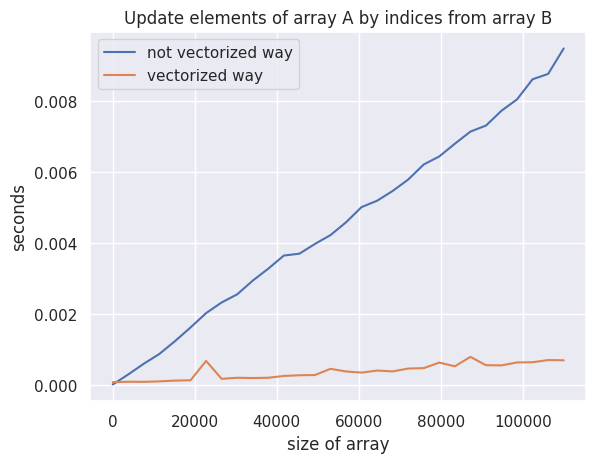

In [ ]:
plt.title("Update elements of array A by indices from array B")
plt.plot(sizes, time_list_simple_2)
plt.plot(sizes, time_list_vectorized_2)
plt.xlabel('size of array')
plt.ylabel('seconds')
plt.legend(["not vectorized way", "vectorized way"]);

In [ ]:
time_list_simple_3 = []
time_list_vectorized_3 = []
data = generate_data_task3()
sizes = data[1]
for i in data[0]:
    time_list_simple_3.append(func_time(FUNCS_DATA['generate_data_task3'][0], i[0]))
    time_list_vectorized_3.append(func_time(FUNCS_DATA['generate_data_task3'][1], i[0]))


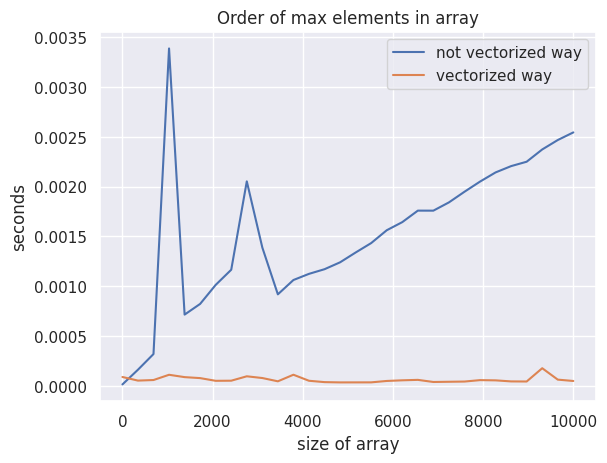

In [ ]:
plt.title("Order of max elements in array")
plt.plot(sizes, time_list_simple_3)
plt.plot(sizes, time_list_vectorized_3)
plt.xlabel('size of array')
plt.ylabel('seconds')
plt.legend(["not vectorized way", "vectorized way"]);

In [ ]:
from tqdm import tqdm

In [ ]:
time_list_simple_4 = []
time_list_vectorized_4 = []
data = generate_data_task4()
sizes = data[1]
for i in tqdm(data[0]):
    time_list_simple_4.append(func_time(FUNCS_DATA['generate_data_task4'][0], i[0], i[1]))
    time_list_vectorized_4.append(func_time(FUNCS_DATA['generate_data_task4'][1], i[0], i[1]))

100%|██████████| 30/30 [00:54<00:00,  1.83s/it]


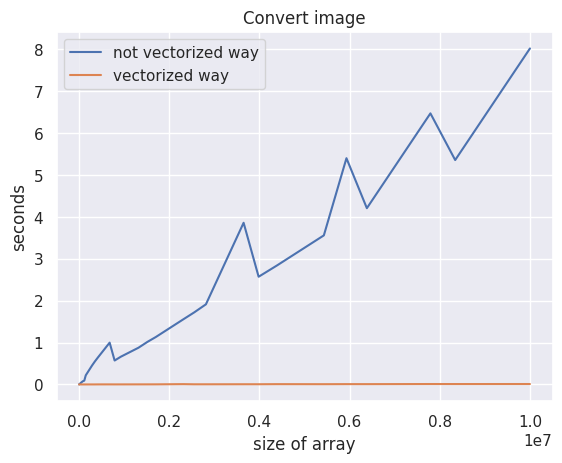

In [ ]:
plt.title("Convert image")
plt.plot(sizes, time_list_simple_4)
plt.plot(sizes, time_list_vectorized_4)
plt.xlabel('size of array')
plt.ylabel('seconds')
plt.legend(["not vectorized way", "vectorized way"]);

In [ ]:
time_list_simple_5 = []
time_list_vectorized_5 = []
data = generate_data_task5()
sizes = data[1]
k = 0
for i in data[0]:
    time_list_simple_5.append(func_time(FUNCS_DATA['generate_data_task5'][0], i[0], i[1]))
    time_list_vectorized_5.append(func_time(FUNCS_DATA['generate_data_task5'][1], i[0], i[1]))

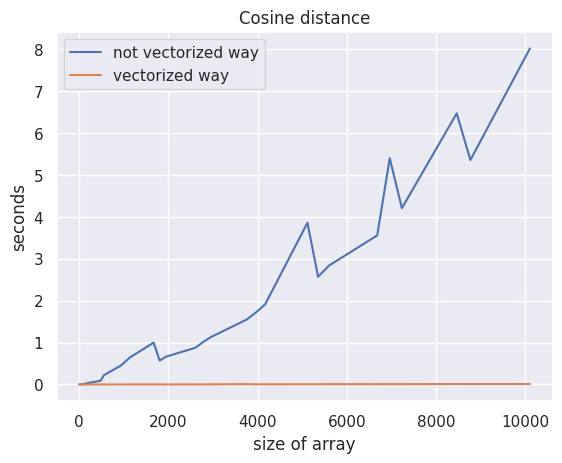

In [ ]:
plt.title("Cosine distance")
plt.plot(sizes, time_list_simple_4)
plt.plot(sizes, time_list_vectorized_4)
plt.xlabel('size of array')
plt.ylabel('seconds')
plt.legend(["not vectorized way", "vectorized way"]);

**<font color='orange'>Вывод:</font>** Все функции, написанные на numpy отработали крайне быстро на фоне функций написанных на чистом python. Видно, что время выполнения функций, написанных на чистом python, увеличивается пропорционально времени, в то время как numpy-функции работают практически также.

----------------

Теперь загрузим [данные с семинара](https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast?select=train.csv), но также исследуем и другие их части

In [ ]:
! gdown 145P96X5FehFjUcV5ePqxo9cExvDibhO9

Downloading...
From: https://drive.google.com/uc?id=145P96X5FehFjUcV5ePqxo9cExvDibhO9
To: /content/features.csv
100% 592k/592k [00:00<00:00, 133MB/s]


In [ ]:
! gdown 1xzwPpKcCZaiV1tDQTN3Zvcwx5T9N82mY

Downloading...
From: https://drive.google.com/uc?id=1xzwPpKcCZaiV1tDQTN3Zvcwx5T9N82mY
To: /content/train.csv
100% 12.8M/12.8M [00:00<00:00, 39.1MB/s]


In [ ]:
! gdown 1rTMrFO07OKeGPEK5lyZIhf1Wy5SQCpWd

Downloading...
From: https://drive.google.com/uc?id=1rTMrFO07OKeGPEK5lyZIhf1Wy5SQCpWd
To: /content/stores.csv
100% 532/532 [00:00<00:00, 2.34MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv("/content/train.csv")
features = pd.read_csv("/content/features.csv")
stores = pd.read_csv("/content/stores.csv")
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


-------

## Задача 2  <font color='orange'>[2 балла]</font>

<font color='orange'> Задание [1 балл]</font> Изобразите распределение температур (Temperature) в регионе для каждого магазине (Store) на одном графике (box plot)

<font color='orange'>(?) Вопрос [1 балл]</font> Какой магазин пережил самую низкую температуру? А самую высокую?

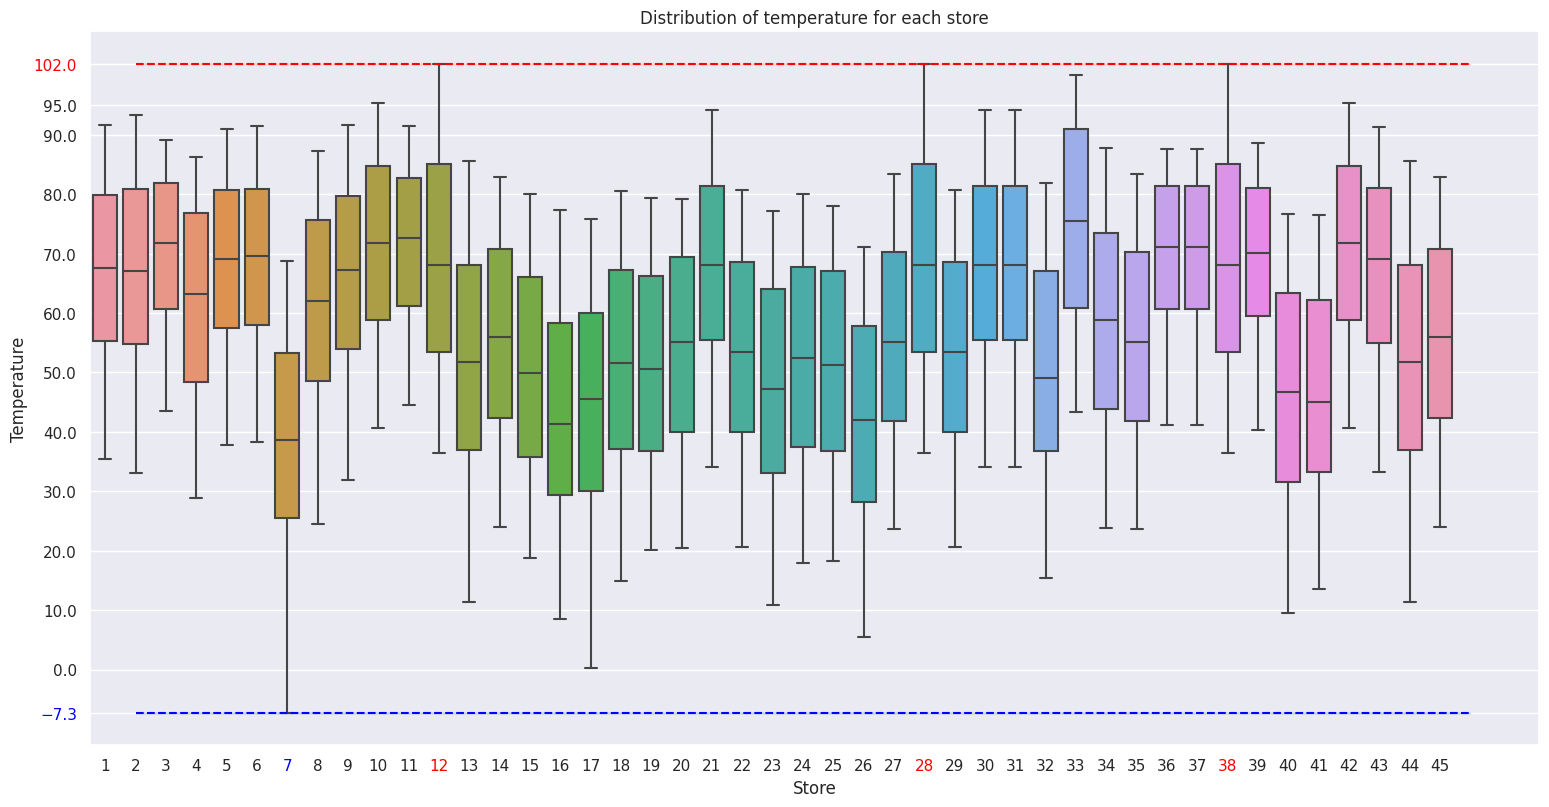

In [ ]:
# Ваш код здесь
ticks_y = [max(features['Temperature']), 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, min(features['Temperature'])]
ax = sns.boxplot(features, x='Store', y='Temperature').set_title("Distribution of temperature for each store");
sns.set(rc={'figure.figsize':(18.7,9.27)})
sns.lineplot(features, x='Store', y = max(features['Temperature']), linestyle='--', color="red")
sns.lineplot(features, x='Store', y = min(features['Temperature']), linestyle='--', color="blue")
plt.yticks(ticks_y);

i = 0
for tick_label in plt.gca().get_yticklabels()[::-1]:
    tick_text = tick_label.get_text()
    if tick_text == "102.0":
        tick_label.set_color("red")
    elif i == 0:
        tick_label.set_color('blue')
    i += 1

for tick_label in plt.gca().get_xticklabels():
    tick_text = tick_label.get_text()
    if tick_text in ("12", "28", "38"):
        tick_label.set_color("red")
    elif tick_text == "7":
        tick_label.set_color('blue')


**<font color='orange'>Из наблюдения:</font>** самую <font color='blue'>низкую</font> температуру (-7.3) показал магазин с номером **7**, а самую <font color='red'>высокую</font> (102) показали магазины **12, 28, 38**

----------

## Задача 3  <font color='orange'>[4 балла]</font>

<font color='orange'>Задание [1 балл]</font>  Выберите один любой магазин (напишите, какой выбрали). Изобразите heatmap корелляции 4 признаков: Temperature, Fuel_Price, CPI и Weekly_Sales (берем весь период наблюдений).

<font color='orange'>(?) Вопрос [1 балл] </font> Есть ли корелляция? Как вы думаете, почему?

---------

<font color='orange'>Задание [1 балл] </font> Изобразите такую же корелляцию, только уже сразу для всех магазинов (не разделяя их никак)

<font color='orange'>(?) Вопрос [1 балл] </font> Есть ли корелляция в данном случае? Совпадает ли она с кореляцией по 1му магазину? Как вы думаете, почему?




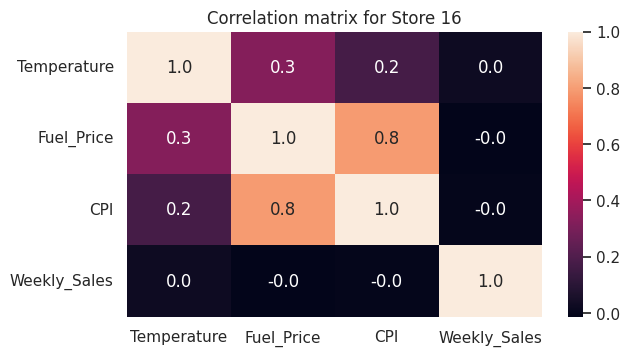

In [ ]:
# Ваш код здесь
store_number = 16
features_16 = features[features['Store'] == 16]
data_16 = data[data['Store'] == 16]
res_16 = pd.merge(features_16, data_16, how='inner', on='Date')
res_16 = pd.concat([res_16['Temperature'], res_16['Fuel_Price'], res_16['CPI'], res_16['Weekly_Sales']], axis=1)
sns.heatmap(res_16.corr(), annot=True, fmt=".1f").set_title("Correlation matrix for Store 16")
sns.set(rc={'figure.figsize':(6.7,3.7)})

**<font color='orange'>Вывод:</font>** высокая корреляция наблюдается только между CPI и Fuel price, но это, в принципе, логично, так как при изменении индекса потребительских цен, меняются цены на все товары, следовательно это отразится и на цене топлива.

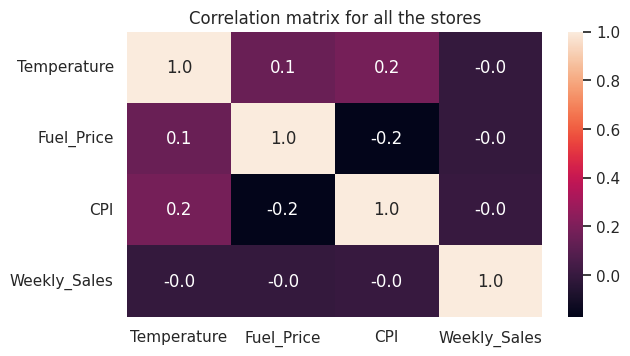

In [ ]:
res = pd.merge(features, data, how='inner', on='Date')
res = pd.concat([res['Temperature'], res['Fuel_Price'], res['CPI'], res['Weekly_Sales']], axis=1)
sns.heatmap(res.corr(), annot=True, fmt=".1f").set_title("Correlation matrix for all the stores")
sns.set(rc={'figure.figsize':(6.7,3.7)})

**<font color='orange'>Вывод:</font>** матрица корреляций по всем магазином сильно отличается от матрицы корреляций для одного магазина. Больше нет той линейной зависимости CPI и Fuel_price.

--------

## Задача 4  <font color='orange'>[2 балла]</font>

<font color='orange'>Задание [1 балл]</font> Изобразите те же самые графики из задания 3 и ответьте на все те же самые вопросы, если построить графики в двух версиях:
* ТОЛЬКО по праздничным неделям и
* ТОЛЬКО НЕ по праздничным неделям.

<font color='orange'>(?) Вопрос [1 балл]</font> Есть ли и какие изменения в корелляции по сравнению c корелляцией в общем случае? Какие различия есть в корелляции по праздничным неделям и не по праздничным неделям?

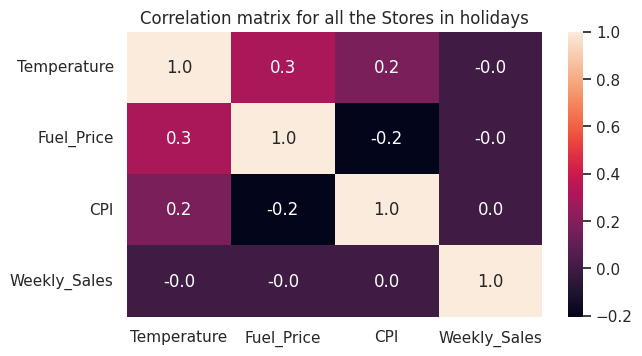

In [ ]:
# Ваш код здесь
features_holiday = features[features['IsHoliday'] == True]
data_holiday = data[data['IsHoliday'] == True]
res_holiday = pd.merge(features_holiday, data_holiday, how='inner', on='Date')
res_holiday_corr = pd.concat([res_holiday['Temperature'], res_holiday['Fuel_Price'], res_holiday['CPI'], res_holiday['Weekly_Sales']], axis=1)
sns.heatmap(res_holiday_corr.corr(), annot=True, fmt=".1f").set_title("Correlation matrix for all the Stores in holidays")
sns.set(rc={'figure.figsize':(6.7,3.7)})
#res_holiday


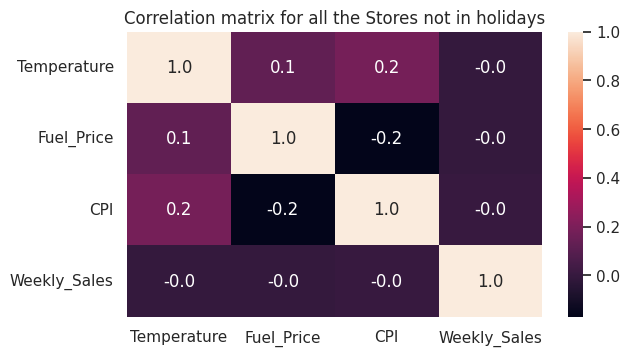

In [ ]:
features_not_holiday = features[features['IsHoliday'] == False]
data_not_holiday = data[data['IsHoliday'] == False]
res_not_holiday = pd.merge(features_not_holiday, data_not_holiday, how='inner', on='Date')
res_not_holiday_corr = pd.concat([res_not_holiday['Temperature'], res_not_holiday['Fuel_Price'], res_not_holiday['CPI'], res_not_holiday['Weekly_Sales']], axis=1)
sns.heatmap(res_not_holiday_corr.corr(), annot=True, fmt=".1f").set_title("Correlation matrix for all the Stores not in holidays")
sns.set(rc={'figure.figsize':(6.7,3.7)})

**<font color='orange'>Вывод:</font>** глобальной разницы нет между графиками ни между собой, ни с графиком общей корреляции по всем дням

--------

## Задача 5  <font color='orange'>[2 балла]</font>

<font color='orange'>Задание [1 балл] </font> Изобразите средние недельные продажи в праздничные/непраздничные недели сразу по всем магазинами (т.е. не разделяя их) в зависимости от их типа (Type) на одном графике (bar plot)

<font color='orange'>(?) Вопрос: [1 балл]</font> Есть ли какие-то зависимости? Если да, то какие?

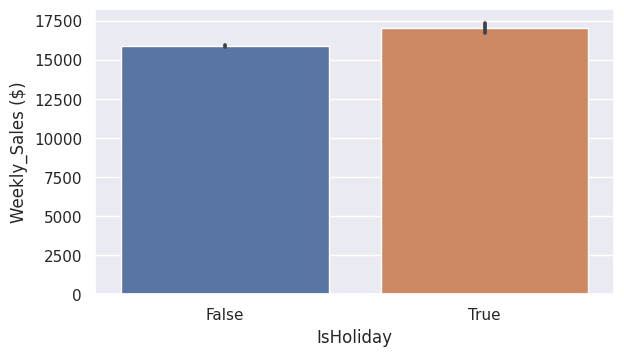

In [ ]:
sns.barplot(data=data, x='IsHoliday', y='Weekly_Sales')
plt.ylabel("Weekly_Sales ($)");

**<font color='orange'>Вывод:</font>** В выходные, что закономерно, продажи ненамного больше.

---------

## Задача 6 (бонусная)  <font color='orange'>[до 5 бонусных баллов]</font>

Попробуйте найти больше зависимостей/интересных моментов/аномалий итд с помощью построения различного рода графиков.

За данное задание можно получить до X баллов, чем больше вы всего обнаружите, тем ваш балл будет выше! :)

In [ ]:
# Ваш код здесь
df = data.merge(features, on=['Store', 'Date'], how='inner')
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df.Date.dt.year
df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,WeekOfYear
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,5.0


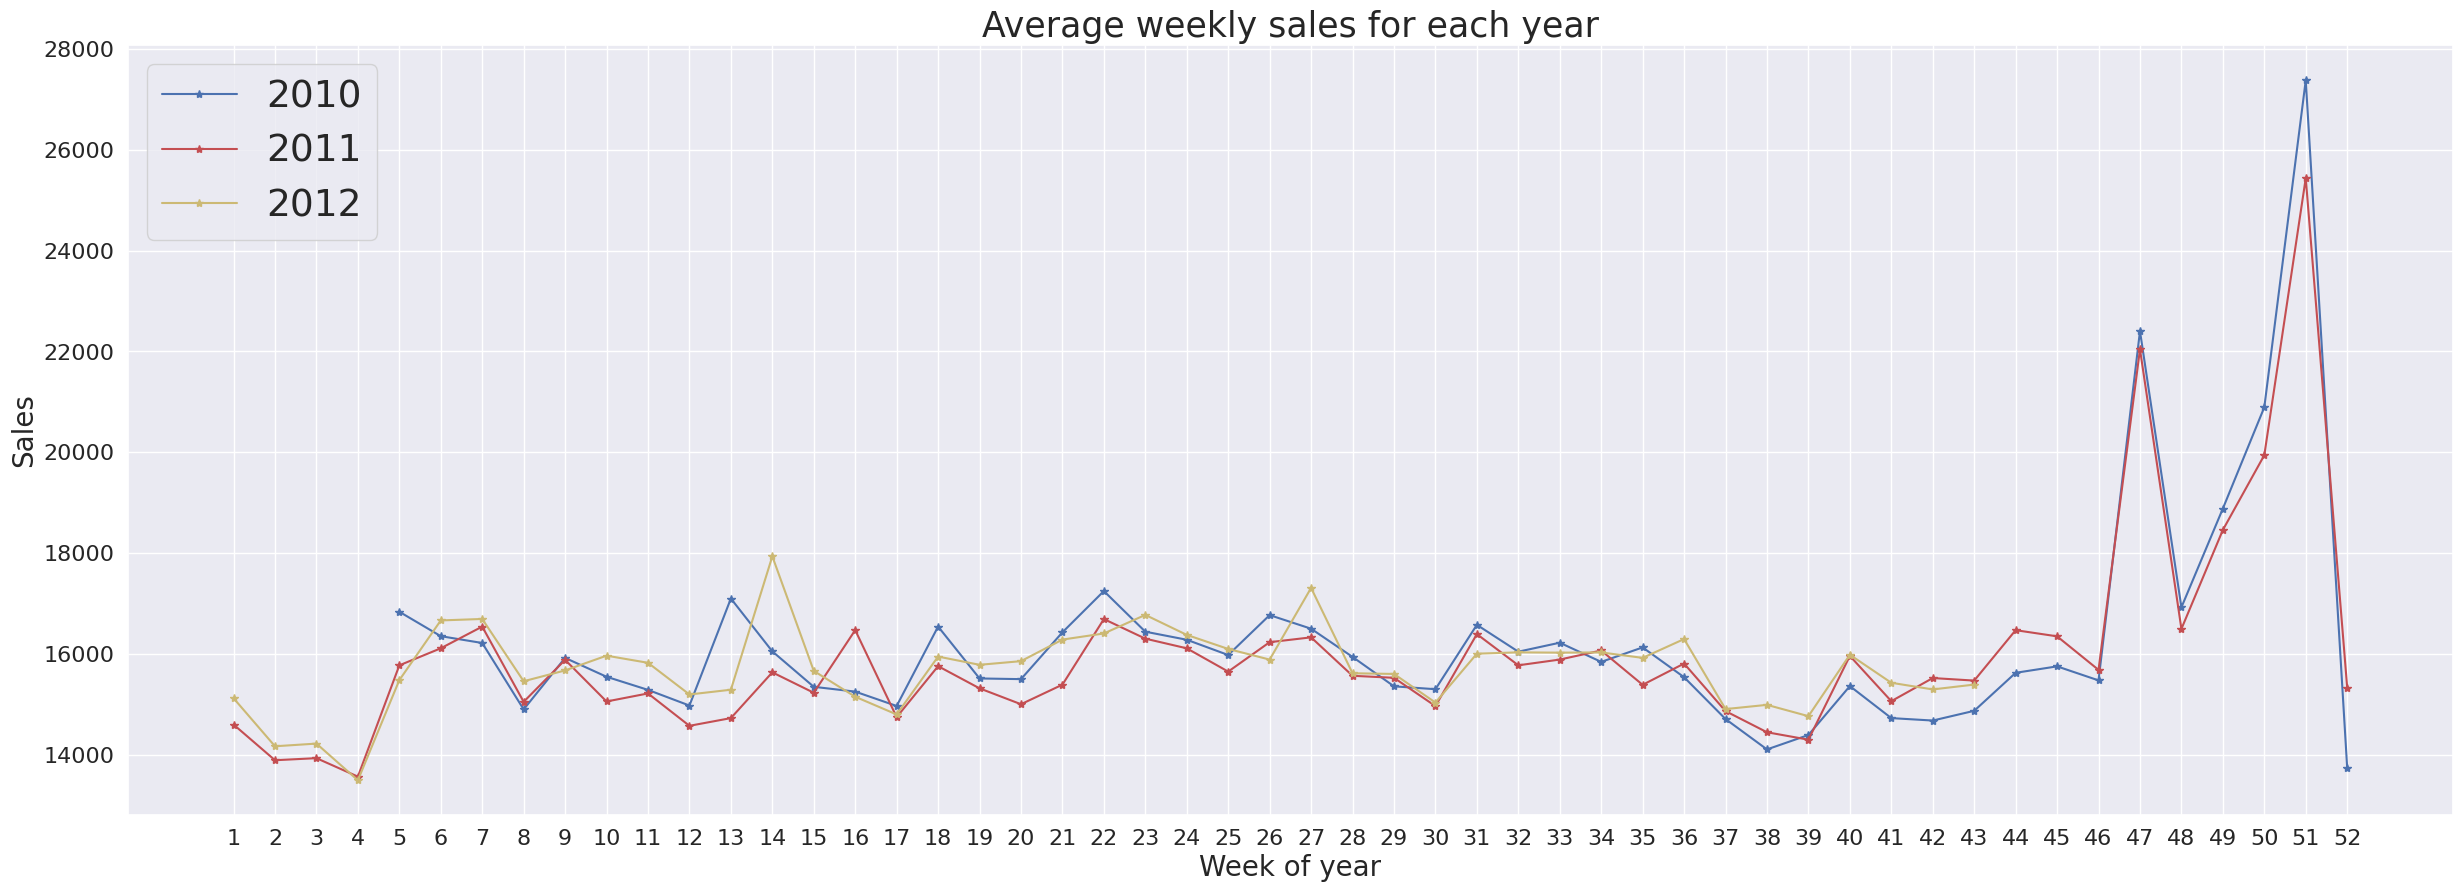

In [ ]:
weekly_sales_2010 = df[df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(30,10))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, '*-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, '*-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-y')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Week of year', fontsize=20,)
plt.ylabel('Sales', fontsize=20)

plt.title("Average weekly sales for each year", fontsize=25)
plt.legend(['2010', '2011', '2012'], fontsize=27);

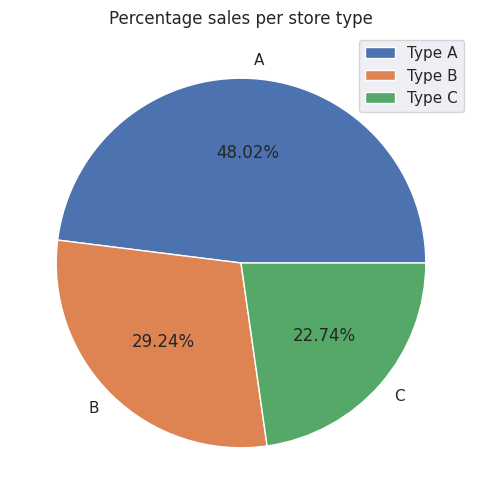

In [ ]:
df_types = pd.merge(data, stores, on='Store')
data_types = df_types.groupby('Type').mean()
plt.pie(data_types['Weekly_Sales'], labels=data_types.index, autopct='%0.2f%%')
plt.title("Percentage sales per store type")
plt.rcParams["figure.figsize"] = (10,6)
plt.legend(['Type A', 'Type B', 'Type C']);

**<font color='orange'>Вывод:</font>**

1) В конце года продажи резко возрастают.

2) Магазины типа А совершают примерно половину продаж из всех.   